# **Synthetic Learning Behavior Analysis: Transform**

## Objectives

* By the end of the transformation phase, I will:
    1. Encode and transform features.
    2. Run statistical tests and validate hypothesis.
    3. Visualize results and build a dashboard for communication.
    4. Build a model that is ready for real-world use.


## Inputs

* [Task outline](https://code-institute-org.github.io/5P-Assessments-Handbook/da-ai-bootcamp-capstone-prelims.html)
* Extract phase
* personalized_learning_dataset_copy.csv 


## Outputs

* Transformed dataset.
* Statistical tests that prove how features interact.
* PowerBI Dashboard.
* Logistic Regression and ML Model 

---

# Import key libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from feature_engine.encoding import OneHotEncoder
from sklearn.pipeline import Pipeline
import pingouin as pg #I need to install pingouin library to perform statistical tests.

# Data upload

In [4]:
df = pd.read_csv("../data/transformed_data/personalized_learning_dataset_transformed.csv")
df.head(5)

,Age,Education_Level,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Feedback_Score,Dropout_Likelihood,Gender_Female,Gender_Male,Course_Name_Machine Learning,Course_Name_Python Basics,Course_Name_Data Science,Course_Name_Web Development,Learning_Style_Visual,Learning_Style_Reading/Writing,Learning_Style_Kinesthetic
0,15,0,171,4,67,2,89,1,51,1,0,1,0,1,0,0,0,1,0,0
1,49,1,156,4,64,0,94,1,92,5,0,0,1,0,1,0,0,0,1,0
2,20,1,217,2,55,2,67,1,45,1,0,1,0,0,1,0,0,0,1,0
3,37,1,489,1,65,43,60,2,59,4,0,1,0,0,0,1,0,1,0,0
4,34,2,496,3,59,34,88,1,93,3,0,1,0,0,1,0,0,1,0,0


---

# Statistical tests

From the exrtact phase, we know that the synthetic dataset has features that are non-normally distributed. However, let me confirm that.

In [5]:
pg.normality(data = df.sample(n= 5000), alpha = 0.05) 
#Checking for normality in the sample data. As the original dataset has 10,000 samples I am using a smaller sample for testing.

,W,pval,normal
Age,0.955055,1.051104e-36,False
Education_Level,0.803687,3.081174e-61,False
Time_Spent_on_Videos,0.954248,5.807329e-37,False
Quiz_Attempts,0.856829,1.931920e-55,False
Quiz_Scores,0.954382,6.403876e-37,False
Forum_Participation,0.957736,8.024753e-36,False
Assignment_Completion_Rate,0.953360,3.053161e-37,False
Engagement_Level,0.805327,4.432268e-61,False
Final_Exam_Score,0.954734,8.293081e-37,False
Feedback_Score,0.889518,6.670864e-51,False


The observation is in line with what I learnt from the Extract phase. None of the features are normally distributed.

## Statistical method: Justification

As all the features are non-normally distributed, I will require non-parametric tests. The actual test will depend on the hypotheses I am trying to prove.

Here are a couple of non-parameteic tests:
* Mann-Whitney U-Test
* Kruskal-Wallis Test

---

## Statistical method: Formulae credit

**Formulae credit:** For all the formulae used in this project, I leveraged the [LMS](https://learn.codeinstitute.net/courses/course-v1:CodeInstitute+FDAT+4/courseware/66f15aeacd89463daf460cf7429c28d2/a89a8ad7f7804985a1ba34907c97acc8/) to remind myself of the arguments and underlying principle.

# Business requirement #1: Learner clusters

User story: As a digital learning service provider, we want to group learners and enable adaptive learning experiences, so that we engage better with the existing users.

In [ ]:
pip install nbformat

Freezing the requirement.txt in the terminal now.

In [7]:
print(df.shape)
df.head(3)


(10000, 20)


,Age,Education_Level,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Feedback_Score,Dropout_Likelihood,Gender_Female,Gender_Male,Course_Name_Machine Learning,Course_Name_Python Basics,Course_Name_Data Science,Course_Name_Web Development,Learning_Style_Visual,Learning_Style_Reading/Writing,Learning_Style_Kinesthetic
0,15,0,171,4,67,2,89,1,51,1,0,1,0,1,0,0,0,1,0,0
1,49,1,156,4,64,0,94,1,92,5,0,0,1,0,1,0,0,0,1,0
2,20,1,217,2,55,2,67,1,45,1,0,1,0,0,1,0,0,0,1,0


In [43]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

#Importing all the required libraries.

def cluster_pipeline(): #Creating a pipeline, or a series of steps to be executed, for building a clustering model.

    pipeline = Pipeline([
        ("feature_scaling", StandardScaler()), #I learned that before component analysis I also need to determine when to normalize and when to standardize.
        ("PCA", PCA(n_components = 20, random_state = 42)), #I have chosen all the 20 features and will adjust during tuning.
        ("model", KMeans(n_clusters = 20, random_state = 42)) #Chosen 20 clusters, will modify this with Elbow and Silhouette scores.
    ])
    return pipeline

In [9]:
pipeline_clustering = cluster_pipeline()

pipeline_scaling = Pipeline(pipeline_clustering.steps[:-2]) #Pipeline for feature scaling.

df_scaled = pipeline_scaling.fit_transform(df) #Standardizing the data for training.

print(df_scaled.shape, "\n", type(df_scaled)) #Checking the shape of the data after scaling.

(10000, 20) 
 <class 'numpy.ndarray'>


Checking if scaling is complete

In [10]:
df_scaled

array([[-1.70318575, -1.3049119 , -0.59566404, ...,  1.72058015,
        -0.58566454, -0.56857403],
       [ 1.67581584,  0.13158293, -0.70155937, ..., -0.58119931,
         1.70746209, -0.56857403],
       [-1.20627375,  0.13158293, -0.27091837, ..., -0.58119931,
         1.70746209, -0.56857403],
       ...,
       [ 0.78137424,  1.56807775, -1.06160349, ...,  1.72058015,
        -0.58566454, -0.56857403],
       [ 1.17890384, -1.3049119 , -0.07324709, ...,  1.72058015,
        -0.58566454, -0.56857403],
       [ 0.68199184,  0.13158293, -0.59566404, ...,  1.72058015,
        -0.58566454, -0.56857403]])

In [ ]:
n_components = 20

pca = PCA(n_components = n_components, random_state = 42).fit(df_scaled) #Fitting PCA to the scaled data.
x_pca = pca.transform(df_scaled) #Transforming the scaled data using the fitted PCA.

#Checking the explained variance ration to understand the importance of each component.

components_list = ["Component " + str(number) for number in range(n_components)]
dfExplVarRatio = pd.DataFrame(
    data = np.round(100 * pca.explained_variance_ratio_, 3), #Helps review the percentage of importance
    index = components_list,
    columns = ["Explained Variance (%)"])

PercentageofDataExplained = dfExplVarRatio["Explained Variance (%)"].sum()

#Adding a cumulative percentage column as avoids manual calculation.
dfExplVarRatio["Cumulative Explained Variance (%)"] = dfExplVarRatio["Explained Variance (%)"].cumsum()

print(f"* The {n_components} components explain {round(PercentageofDataExplained)} % of the data \n")

print(dfExplVarRatio)

* The 20 components explain 100 % of the data 

              Explained Variance (%)  Cumulative Explained Variance (%)
Component 0                    9.625                              9.625
Component 1                    6.748                             16.373
Component 2                    6.699                             23.072
Component 3                    6.291                             29.363
Component 4                    6.254                             35.617
Component 5                    6.228                             41.845
Component 6                    5.285                             47.130
Component 7                    5.188                             52.318
Component 8                    5.162                             57.480
Component 9                    5.043                             62.523
Component 10                   4.978                             67.501
Component 11                   4.959                             72.460
Component 12    

The fact that the first 10 components capture only about 62.53 percent of the total variance, means that the variance is spread rather evenly among all components. This suggests that the features are not highly correlated and each contribute unique information.

Given that the dataset is engineered (synthetic), this is expected.

I am choosing the first 16 components as they explain a total of 91.9 percent of the data.

In [13]:
n_components = 16

pca = PCA(n_components = n_components, random_state = 42).fit(df_scaled) #Fitting PCA to the scaled data.
x_pca = pca.transform(df_scaled) #Transforming the scaled data using the fitted PCA.

#Checking the explained variance ration to understand the importance of each component.

components_list = ["Component " + str(number) for number in range(n_components)]
dfExplVarRatio = pd.DataFrame(
    data = np.round(100 * pca.explained_variance_ratio_, 3), #Helps review the percentage of importance
    index = components_list,
    columns = ["Explained Variance (%)"])

PercentageofDataExplained = dfExplVarRatio["Explained Variance (%)"].sum()

dfExplVarRatio["Cumulative Explained Variance (%)"] = dfExplVarRatio["Explained Variance (%)"].cumsum()

print(f"* The {n_components} components explain {round(PercentageofDataExplained)} % of the data \n")

print(dfExplVarRatio)

* The 16 components explain 92 % of the data 

              Explained Variance (%)  Cumulative Explained Variance (%)
Component 0                    9.625                              9.625
Component 1                    6.748                             16.373
Component 2                    6.699                             23.072
Component 3                    6.291                             29.363
Component 4                    6.254                             35.617
Component 5                    6.228                             41.845
Component 6                    5.285                             47.130
Component 7                    5.188                             52.318
Component 8                    5.162                             57.480
Component 9                    5.043                             62.523
Component 10                   4.978                             67.501
Component 11                   4.959                             72.460
Component 12     

In [14]:
def cluster_pipeline(): #Rerunning with 16 components.

    pipeline = Pipeline([
        ("feature_scaling", StandardScaler()),
        ("PCA", PCA(n_components = 16, random_state = 42)), #Updated to 16 features.
        ("model", KMeans(n_clusters = 20, random_state = 42)) #Chosen 20 clusters, will modify this with elbow and Silhouette scores.
    ])
    return pipeline

In [15]:
pipeline_clustering = cluster_pipeline()

pipeline_analysis = Pipeline(pipeline_clustering.steps[:-1]) #Pipeline for analysis without the model.

df_analysis = pipeline_analysis.fit_transform(df) #Training the dataset on PCA components.

print(df_analysis.shape, "\n", type(df_analysis)) 

(10000, 16) 
 <class 'numpy.ndarray'>


c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change 

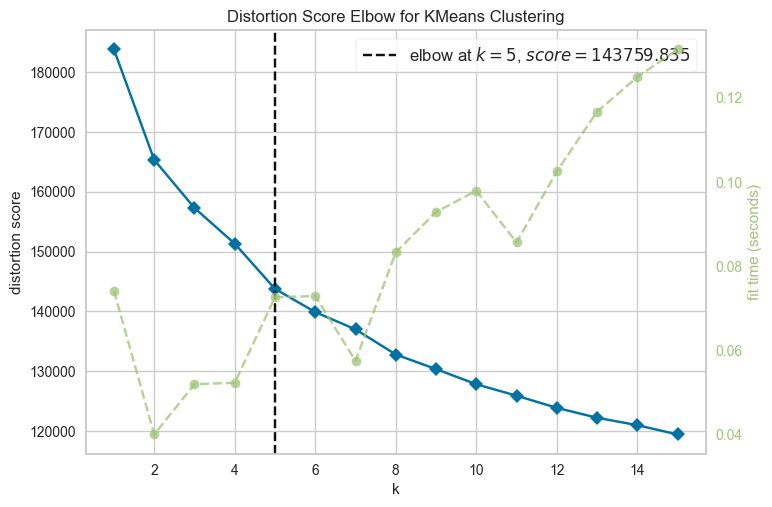

In [46]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(random_state=42), k = (1, 16))
visualizer.fit(df_analysis)
visualizer.show() #Visualizing the elbow method to determine the optimal number of clusters.
plt.show()
#Ignoring the future warnign for now.

Elbow-score recommends that I create 5 clusters.

Cross-verifying the number of clusters with a Silhouette score

 --- Average Silhouette Score for different number of clusters ---


c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


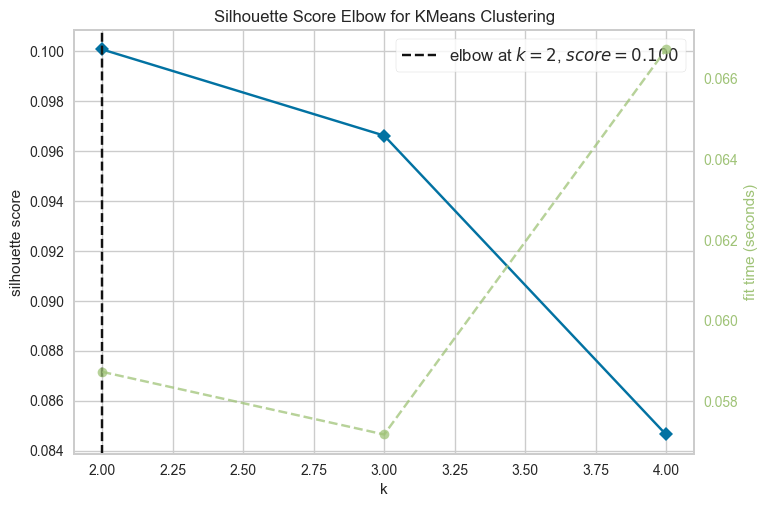

 *** Silhouette plot for 2 clusters ***


c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


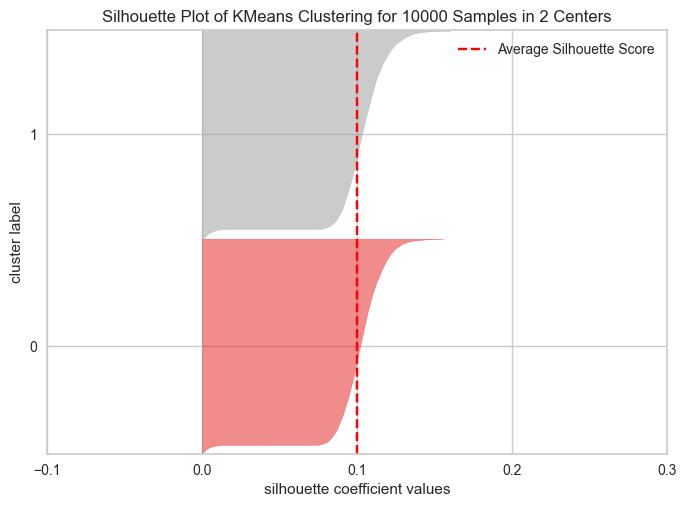



 *** Silhouette plot for 3 clusters ***


c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


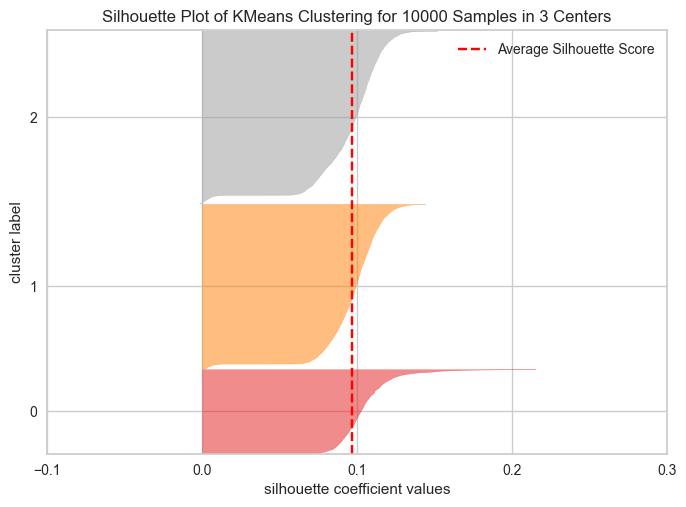



 *** Silhouette plot for 4 clusters ***


c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


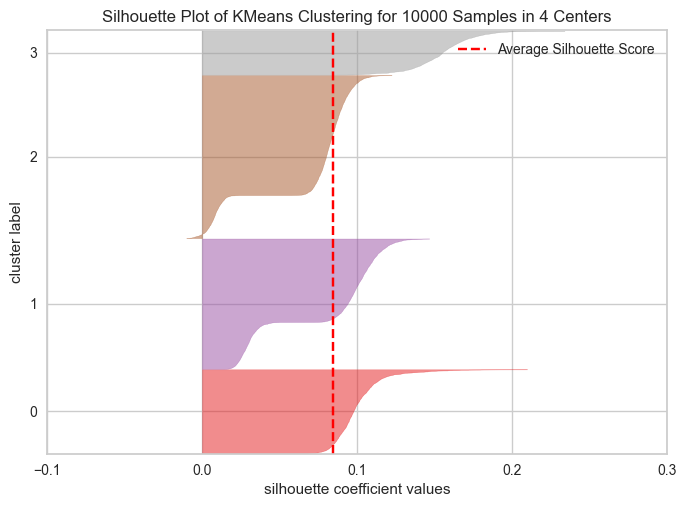



 *** Silhouette plot for 5 clusters ***


c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


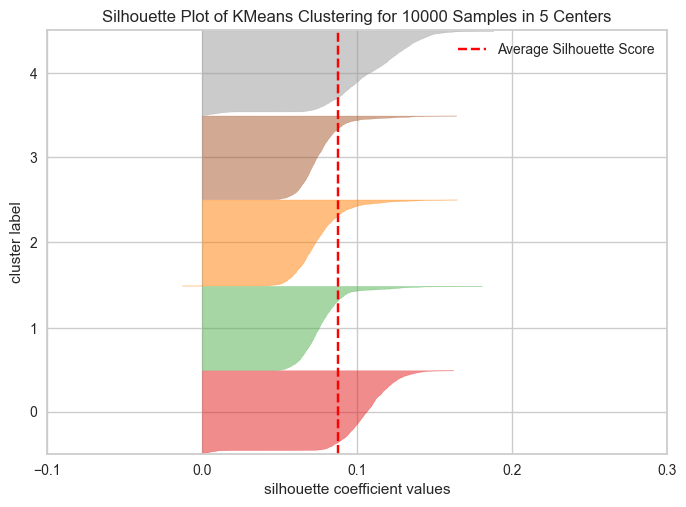



 *** Silhouette plot for 6 clusters ***


c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


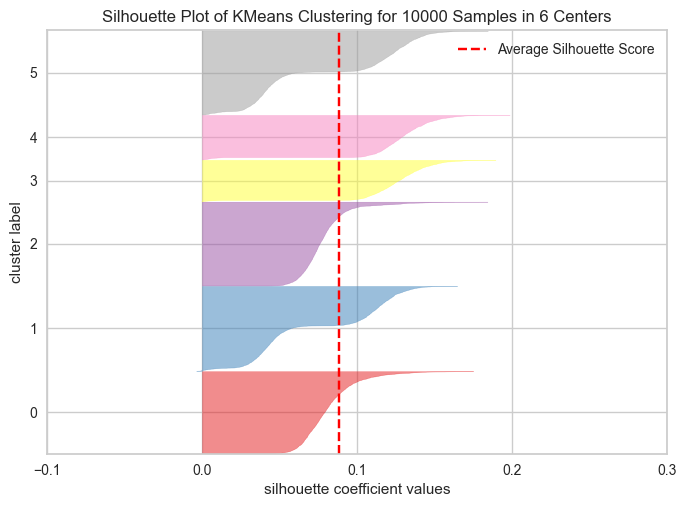



 *** Silhouette plot for 7 clusters ***


c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


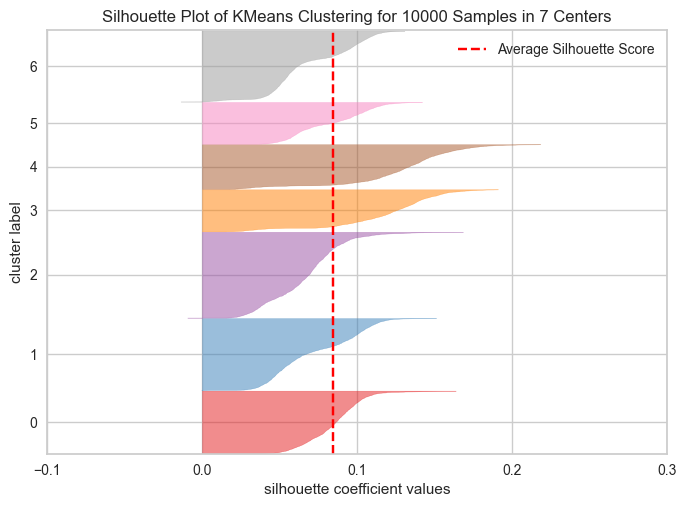



 *** Silhouette plot for 8 clusters ***


c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


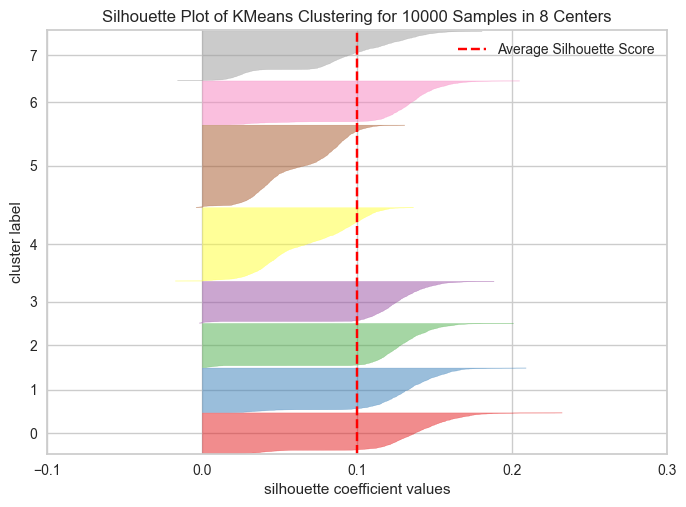



 *** Silhouette plot for 9 clusters ***


c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


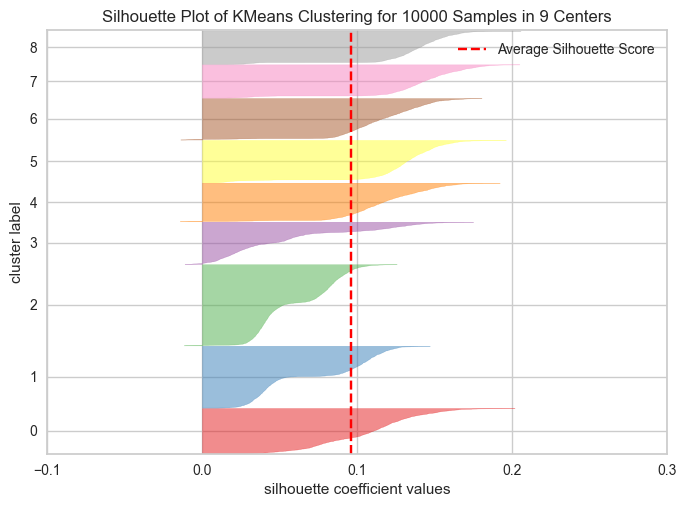



 *** Silhouette plot for 10 clusters ***


c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


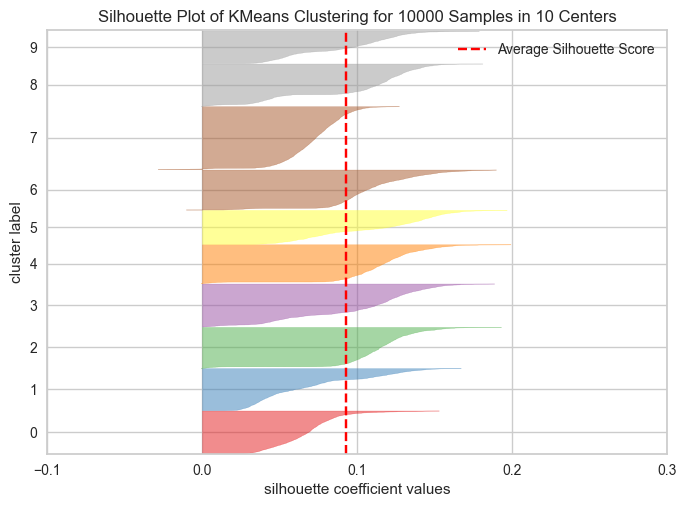



 *** Silhouette plot for 11 clusters ***


c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


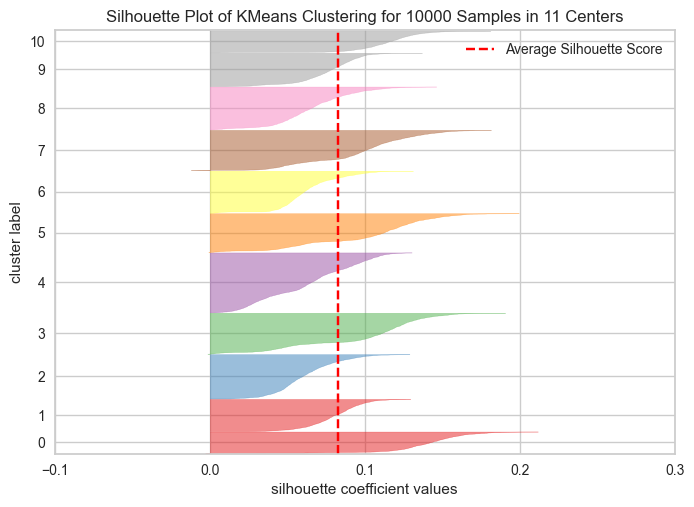



 *** Silhouette plot for 12 clusters ***


c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


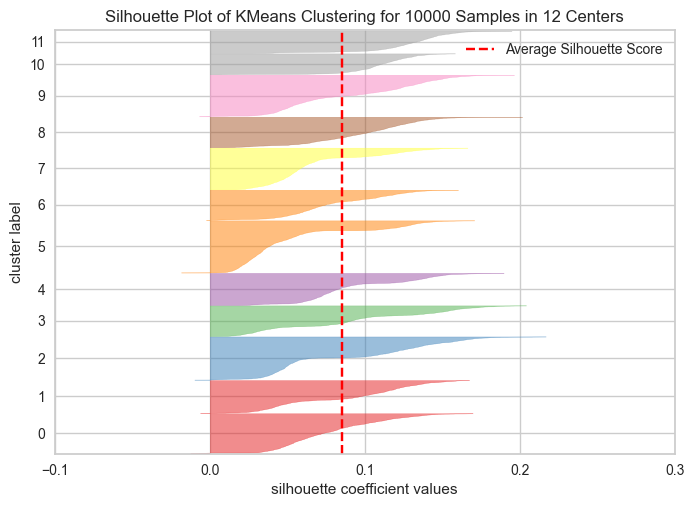



 *** Silhouette plot for 13 clusters ***


c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


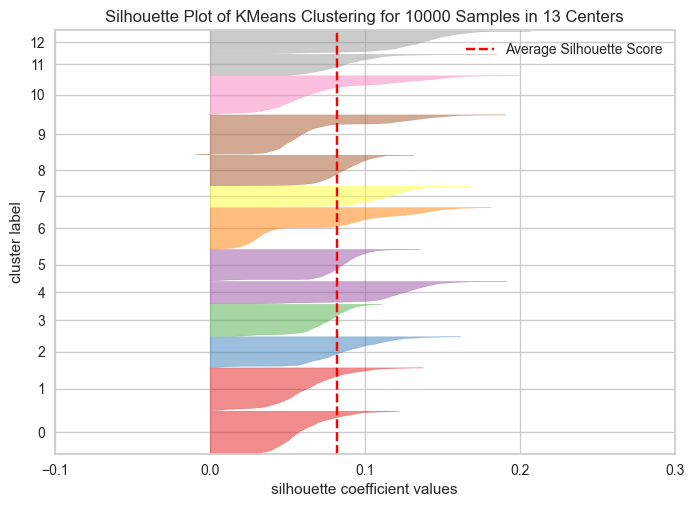



 *** Silhouette plot for 14 clusters ***


c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


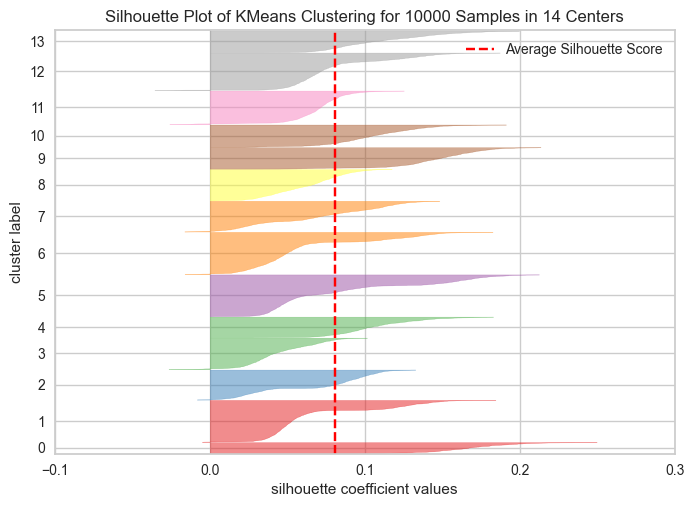



 *** Silhouette plot for 15 clusters ***


c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


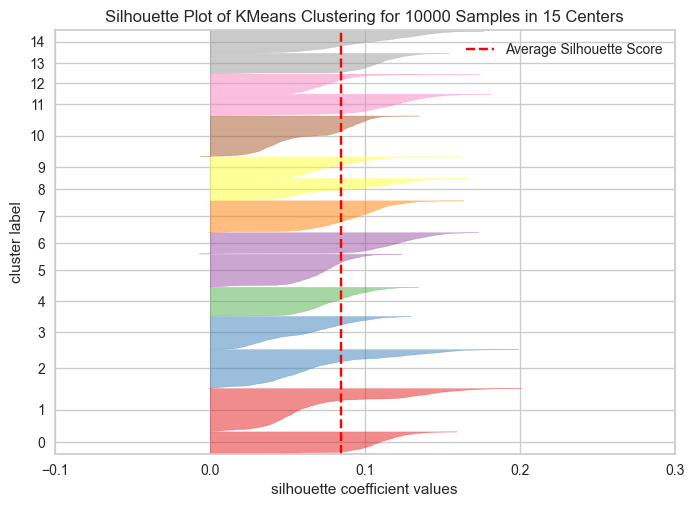

In [17]:
from yellowbrick.cluster import SilhouetteVisualizer

print(" --- Average Silhouette Score for different number of clusters ---")
visualizer = KElbowVisualizer(KMeans(random_state=42), k = (2, 5),
                              metric='silhouette')
#Visualizing the silhouette scores. Updated k as I know I can create 5 clusters from the elbow method.
visualizer.fit(df_analysis)
visualizer.show() 
plt.show()

for n_clusters in np.arange(start = 2, stop = 16):
    print(f" *** Silhouette plot for {n_clusters} clusters ***")
    visualizer = SilhouetteVisualizer(estimator = KMeans(n_clusters=n_clusters, random_state=42))
    visualizer.fit(df_analysis)
    visualizer.show()
    plt.show()
    print("\n")

**Key observations:**
1. Silhouette scores are very low (0 to 0.1). Here's how you interpret them:
    * Negative values: Datapoints belong to another cluster
    * 0 values: Datapoints are overlapping
    * 1: Ideal score datapoints are indicating clear clusters

2. Elbow and silhouette scores offer quite different stories. Elbow score recommends 5 clusters and silhouette recommends 2. 

3. I am choosing a middle ground and going with three clusters.

In [18]:
def cluster_pipeline(): #Rerunning with 3 clusters.

    pipeline = Pipeline([
        ("feature_scaling", StandardScaler()),
        ("PCA", PCA(n_components = 16, random_state = 42)), 
        ("model", KMeans(n_clusters = 3, random_state = 42)) #Updated to 3 clusters
    ])
    return pipeline

cluster_pipeline()

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('PCA', PCA(n_components=16, random_state=42)),
                ('model', KMeans(n_clusters=3, random_state=42))])

In [19]:
X = df.copy() #Creating a copy of the original dataset to avoid modifying it.
print(X.shape)
X.head(3) #Utilizing the whole copied data for training.

(10000, 20)


,Age,Education_Level,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Feedback_Score,Dropout_Likelihood,Gender_Female,Gender_Male,Course_Name_Machine Learning,Course_Name_Python Basics,Course_Name_Data Science,Course_Name_Web Development,Learning_Style_Visual,Learning_Style_Reading/Writing,Learning_Style_Kinesthetic
0,15,0,171,4,67,2,89,1,51,1,0,1,0,1,0,0,0,1,0,0
1,49,1,156,4,64,0,94,1,92,5,0,0,1,0,1,0,0,0,1,0
2,20,1,217,2,55,2,67,1,45,1,0,1,0,0,1,0,0,0,1,0


In [20]:
pipeline_clustering = cluster_pipeline()
pipeline_clustering.fit(X) #Training the model.

c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('PCA', PCA(n_components=16, random_state=42)),
                ('model', KMeans(n_clusters=3, random_state=42))])

In [47]:
X["Clusters"] = pipeline_clustering["model"].labels_
#Assigning cluster labels from the fitted clustering model to a new column in the DataFrame
print(X.shape)
X.head(3)

(10000, 21)


,Age,Education_Level,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Feedback_Score,...,Gender_Female,Gender_Male,Course_Name_Machine Learning,Course_Name_Python Basics,Course_Name_Data Science,Course_Name_Web Development,Learning_Style_Visual,Learning_Style_Reading/Writing,Learning_Style_Kinesthetic,Clusters
0,15,0,171,4,67,2,89,1,51,1,...,1,0,1,0,0,0,1,0,0,2
1,49,1,156,4,64,0,94,1,92,5,...,0,1,0,1,0,0,0,1,0,0
2,20,1,217,2,55,2,67,1,45,1,...,1,0,0,1,0,0,0,1,0,0


* Clusters frequencies 
          proportion
Clusters            
2               0.41
1               0.39
0               0.20 




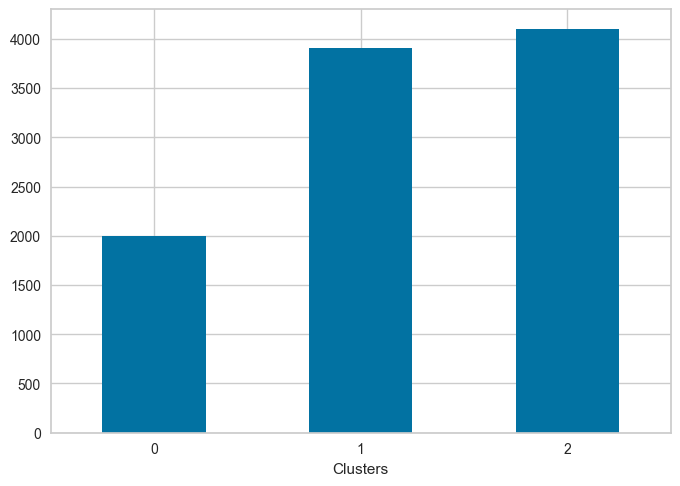

In [48]:
print(f"* Clusters frequencies \n{ X['Clusters'].value_counts(normalize=True).
                                  to_frame().round(2)} \n\n")
#Determining how the clusters look and how much of the data they cover.

X['Clusters'].value_counts().sort_values().plot(kind='bar')
plt.xticks(rotation = 0)
plt.show()

In [49]:
df_clf = X.copy() # Creating a copy of the DataFrame for classification tasks
print(df_clf.shape)
df_clf.head(3)

(10000, 21)


,Age,Education_Level,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Feedback_Score,...,Gender_Female,Gender_Male,Course_Name_Machine Learning,Course_Name_Python Basics,Course_Name_Data Science,Course_Name_Web Development,Learning_Style_Visual,Learning_Style_Reading/Writing,Learning_Style_Kinesthetic,Clusters
0,15,0,171,4,67,2,89,1,51,1,...,1,0,1,0,0,0,1,0,0,2
1,49,1,156,4,64,0,94,1,92,5,...,0,1,0,1,0,0,0,1,0,0
2,20,1,217,2,55,2,67,1,45,1,...,1,0,0,1,0,0,0,1,0,0


In [50]:
from sklearn.model_selection import train_test_split
#Splitting the data for training and testing.
X_train, X_test, y_train, y_test = train_test_split(
    df_clf.drop(["Clusters"], axis = 1),
    df_clf["Clusters"],
    test_size=0.2,
    random_state=42
)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8000, 20) (8000,) (2000, 20) (2000,)


In [52]:
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingClassifier

#Creating a pipeline for feature selection and model training.

def feature_selection_pipeline():
    featsel_pipeline = Pipeline([
        ("feature_scaling", StandardScaler()),
        ("feature_selection", SelectFromModel(GradientBoostingClassifier(random_state=42))),
        #Using GradientBoosting for feature selection.
        ("model", GradientBoostingClassifier(random_state=42))
    ])
    return featsel_pipeline

feature_selection_pipeline()

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=GradientBoostingClassifier(random_state=42))),
                ('model', GradientBoostingClassifier(random_state=42))])

In [26]:
feature_selection_clf = feature_selection_pipeline()
feature_selection_clf.fit(X_train, y_train) #Training the feature selection model.

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=GradientBoostingClassifier(random_state=42))),
                ('model', GradientBoostingClassifier(random_state=42))])

Evaluating the model performance

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_train, feature_selection_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1591
           1       1.00      0.97      0.98      3117
           2       0.97      1.00      0.98      3292

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000



In [28]:
print(classification_report(y_test, feature_selection_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      0.97      0.99       792
           2       0.97      1.00      0.99       805

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



**Key observation:** The precision score of 1 is suggests that the model is overfitting. This is not a good sign as the model will then not be sensitive to real-world data differences.

Determining the most important features

* These are the 2 most important features in descending order. The model was trained on them: 
['Course_Name_Python Basics', 'Gender_Male'] 



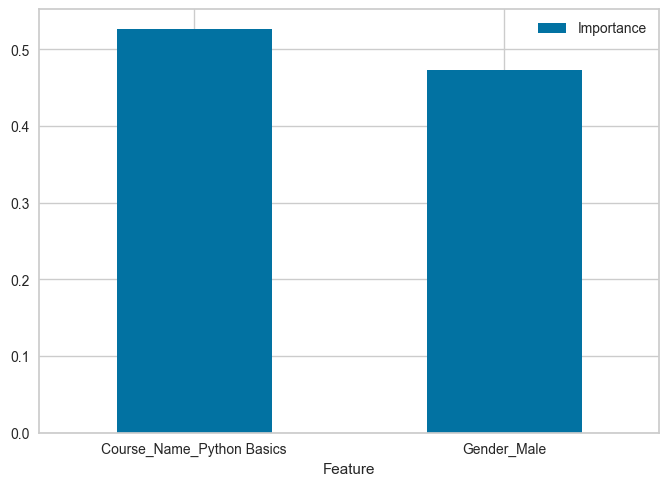

In [53]:
# My dataset requires no data cleaning or feature engineering steps
trained_cols = X_train.columns

best_features = trained_cols[feature_selection_clf['feature_selection'].get_support()].to_list()

# Create DataFrame to display feature importance
df_feature_importance = (pd.DataFrame(data={
          'Feature': best_features,
          'Importance': feature_selection_clf['model'].feature_importances_})
  .sort_values(by='Importance', ascending=False)
  )

best_features = df_feature_importance['Feature'].to_list() # reassign best features in importance order

# Most important features statement and plot
print(f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trained on them: \n{best_features} \n")
df_feature_importance.plot(kind='bar',x='Feature',y='Importance')
plt.xticks(rotation = 0)
plt.show()

**Key observation:** The model has selected Python_Basics and Male gender features from the synthetic dataset.

**Note:** As the synthetic dataset does not have features that are well correlated, the observations from the model will only help us explore this dataset. We will be unable to generalize the results to real-world data.

However, the pipeline can be used on real-world data (once available) to make informed predictions.

Clustering the profiles to understand what they indicate

In [54]:
#Creating a function to describe all clusters

def DescribeAllClusters(df_clf, decimal_points=3):
    rows = [] #Appending dataframe is deprecated so I'd to create an empty list and append later

    for cluster in df_clf.sort_values(by= "Clusters")["Clusters"].unique():

        EDA_ClusterSubset = df_clf.query(f"Clusters == {cluster}").drop(["Clusters"], axis=1)
        ClusterDescription = Clusters_IndividualDescription(EDA_ClusterSubset, cluster, decimal_points)
        rows.append(ClusterDescription)#Learned this through iteration with ChatGPT

    DescribeAllClusters = pd.concat(rows, ignore_index=True)
    DescribeAllClusters.set_index(["Clusters"], inplace=True)
    return DescribeAllClusters

def Clusters_IndividualDescription(EDA_Cluster, cluster, decimal_points=3): 
    # Compute basic statistics for the cluster
    ClustersDescription = pd.DataFrame(columns = EDA_Cluster.columns)
  

    for col in EDA_Cluster.columns:
        try:
            if EDA_Cluster[col].dtypes == "object":
                top_frequencies = (EDA_Cluster.dropna(subset=[col])[(col)]
                                   .value_counts(normalize=True)
                                   .nlargest(n=3))
                Description = ""

                for x in range(len(top_frequencies)):
                    freq = top_frequencies.iloc[x]
                    category = top_frequencies.index[x] #Removed[0] as now I can access the full index
                    categorypercentage = int(round(freq * 100,0))
                    statement = f" '{category}': {categorypercentage}% , "
                    Description = Description + statement #Changed the variable name. Code in the LMS was causing issues.

                ClustersDescription.at[0, col] = Description[:-2]

            elif pd.api.types.is_numeric_dtype(EDA_Cluster[col]): #This was the source of confusion. Rectified this with ChatGPT's help as my dataset is unique.
                DescStats = EDA_Cluster.dropna(subset=[col])[[col]].describe()
                Q1 = round(DescStats.iloc[4,0], decimal_points)
                Q3 = round(DescStats.iloc[6,0], decimal_points)
                Description = f"{Q1} -- {Q3}"
                ClustersDescription.at[0,col] = Description

        except Exception as e:
            ClustersDescription.at[0,col] = 'Not available'
            print(f"** Error Exception: {e} - cluster {cluster}, variable {col}")

    ClustersDescription['Clusters'] = cluster #In the LMS this section was incorrect. Iterated with ChatGPT and rectified.

    return ClustersDescription


In [57]:
#Visualizing the distribution of clusters for each variable

def cluster_distribution_per_variable(df_clf, target):
    df_bar_plot = df_clf.value_counts(["Clusters", target]).reset_index()
    df_bar_plot.columns = ["Clusters", target, "Count"]
    df_bar_plot[target] = df_bar_plot[target].astype("object")

    print(f"Clusters distribution for {target}:")
    fig = px.bar(
        df_bar_plot,
        x="Clusters",
        y="Count",
        color=target,
        title=f"Clusters distribution for {target}",
        width=800,
        height=400
    )
    fig.update_layout(xaxis=dict(tickmode= 'array',tickvals= df['Clusters'].unique()))
    fig.show()

    df_clf_relative = (df_clf
                       .groupby(["Clusters", target])
                       .size()
                       .groupby(level=0)
                       .apply(lambda x:  100*x / x.sum())
                       .reset_index()
                       .sort_values(by=['Clusters']))
    df_clf_relative.columns = ['Clusters',target,'Relative Percentage (%)']
    
    print(f"Relative Percentage (%) of {target} in each cluster")
    fig = px.line(df_relative, x='Clusters',y='Relative Percentage (%)',color=target,width=800, height=500)
    fig.update_layout(xaxis=dict(tickmode= 'array',tickvals= df['Clusters'].unique()))
    fig.update_traces(mode='markers+lines')
    fig.show()

In [58]:
df_cluster_profile = df_clf.copy()
df_cluster_profile = df_cluster_profile.filter(items = best_features + ["Clusters"], axis = 1)
print(df_cluster_profile.shape)
df_cluster_profile.head(3)

(10000, 3)


,Course_Name_Python Basics,Gender_Male,Clusters
0,0,0,2
1,1,1,0
2,1,0,0


In [59]:
cluster_profiles = DescribeAllClusters(df_cluster_profile, decimal_points=2)
display(cluster_profiles)

,Course_Name_Python Basics,Gender_Male
Clusters,,
0,1.0 -- 1.0,0.0 -- 1.0
1,0.0 -- 0.0,1.0 -- 1.0
2,0.0 -- 0.0,0.0 -- 0.0


**Key observations**: Here's what the clusters indicate.
1. Cluster one contains all learners who choose Python Basics, both male and females.
2. Cluster two contains male learners who did not choose Python Basics.
3. Cluster three contains female learners who did not choose Python Basics.

In [60]:
pd.concat([df_cluster_profile.reset_index(drop=True),
           cluster_profiles.reset_index(drop=True)], axis=1).head(4)

,Course_Name_Python Basics,Gender_Male,Clusters,Course_Name_Python Basics,Gender_Male
0,0,0,2,1.0 -- 1.0,0.0 -- 1.0
1,1,1,0,0.0 -- 0.0,1.0 -- 1.0
2,1,0,0,0.0 -- 0.0,0.0 -- 0.0
3,0,0,2,NaN,NaN


**Challenge:** Had an issue with how profiling was limited to the first three samples. Iterated with ChatGPT and learned that the issue occured as I was trying to concatenate two dataframes with varying indexes. I then merged the two dataframes and got the profiling for all instances.

In [35]:
df_cluster_profile.merge(cluster_profiles, on="Clusters", how="left").head(10)

,Course_Name_Python Basics_x,Gender_Male_x,Clusters,Course_Name_Python Basics_y,Gender_Male_y
0,0,0,2,0.0 -- 0.0,0.0 -- 0.0
1,1,1,0,1.0 -- 1.0,0.0 -- 1.0
2,1,0,0,1.0 -- 1.0,0.0 -- 1.0
3,0,0,2,0.0 -- 0.0,0.0 -- 0.0
4,1,0,0,1.0 -- 1.0,0.0 -- 1.0
5,0,1,1,0.0 -- 0.0,1.0 -- 1.0
6,0,1,1,0.0 -- 0.0,1.0 -- 1.0
7,0,1,1,0.0 -- 0.0,1.0 -- 1.0
8,0,1,1,0.0 -- 0.0,1.0 -- 1.0
9,0,0,2,0.0 -- 0.0,0.0 -- 0.0


In [36]:
#Calculate mean profile for each cluster.
cluster_means = df_cluster_profile.groupby('Clusters').mean().reset_index()

    # Melt the DataFrame for plotting
cluster_means_melted = cluster_means.melt(id_vars='Clusters', var_name='Feature', value_name='Mean Value')

    # Plotly bar graph: cluster profiles
fig = px.bar(
    cluster_means_melted,
    x='Feature',
    y='Mean Value',
    color='Clusters',
    barmode='group',
    title='Cluster Profiles: Mean Feature Values by Cluster',
    labels={'Mean Value': 'Mean Value', 'Feature': 'Feature', 'Clusters': 'Cluster'}
    )
fig.update_layout(xaxis_tickangle=0)
fig.show()

**Business recommendations:**
This pipeline intends to provide a placeholder, which the business can use on real data. As this is a synthetic dataset, the clusters may not provide a clear picture. That's because the features are not real-world observation rather synthesized ones.

The clusters observed here cannot be generalized.

## Code credit:

I leveraged the [LMS](https://learn.codeinstitute.net/courses/course-v1:CodeInstitute+ADAT+3/courseware/5d589ae79ce74ea091f4580abb8b3f0c/26d7187df3674d81b2a257e8cdb65a4d/) to reconstruct the code for the whole of K-Means Clustering exercise.
Whenever I ran into trouble, I used ChatGPT to understand what was going wrong and how that can be rectified.

---

# Business requirement #2: Dropout likelihood

User story: As a program manager, I want to be able to predict dropout probability, so that we can engage with high-risk users.

**Hypotheses:**

2.1. Learning style impacts dropout likelihood

2.2. Course choice impacts dropout likelihood

2.3. Time spent on videos impacts dropout likelihood

## 2.1. Learning style impacts dropout likelihood

**Note**: I am testing two categorical features here. Chi-Squared Test can process categorical variables that are object-type data and not just integers. I will reuse the dataset from pre-transformation phase and run a Chi-Square Test.

**Null hypothesis:** Learning style has no statistical realtionship with dropout likelihood.

In [37]:
df_old = pd.read_csv("../data/copied_data/personalized_learning_dataset_copy.csv")
df_old.head(5)

,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood
0,S00001,15,Female,High School,Machine Learning,171,4,67,2,89,Medium,51,Visual,1,No
1,S00002,49,Male,Undergraduate,Python Basics,156,4,64,0,94,Medium,92,Reading/Writing,5,No
2,S00003,20,Female,Undergraduate,Python Basics,217,2,55,2,67,Medium,45,Reading/Writing,1,No
3,S00004,37,Female,Undergraduate,Data Science,489,1,65,43,60,High,59,Visual,4,No
4,S00005,34,Female,Postgraduate,Python Basics,496,3,59,34,88,Medium,93,Visual,3,No


In [38]:
observed, expected, stats = pg.chi2_independence(data = df_old, 
                                                 x = "Learning_Style",
                                                 y= "Dropout_Likelihood")

stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,0.303900,3.0,0.959293,0.005513,0.068472
1,cressie-read,0.666667,0.303654,3.0,0.959340,0.005510,0.068457
2,log-likelihood,0.000000,0.303165,3.0,0.959432,0.005506,0.068426
3,freeman-tukey,-0.500000,0.302801,3.0,0.959501,0.005503,0.068403
4,mod-log-likelihood,-1.000000,0.302439,3.0,0.959569,0.005499,0.068380
5,neyman,-2.000000,0.301725,3.0,0.959704,0.005493,0.068335


**Explanation:** A p-value score of 0.95 indicates that we do not have enough evidence to reject the null hypothesis. We accept it. In the synthetic dataset, learning style has not statistically significant relationship with dropout likelihood.

**Key observation:** The precision score of 1 is suggests that the model is overfitting. This is not a good sign as the model will then not be sensitive to real-world data differences.

In [39]:
contingency_table = pd.crosstab(df_old["Learning_Style"],
                                df_old["Dropout_Likelihood"],
                                normalize = "index")
#Creating a contingency table to plot categorical variables.

contingency_table_melted = contingency_table.reset_index().melt(
    id_vars = "Learning_Style",
    var_name = "Dropout_Likelihood",
    value_name = "Proportion"
) #Melting the contingency table for easier plotting.

fig = px.bar(
    data_frame = contingency_table_melted,
    x = "Learning_Style",
    y = "Proportion",
    color = "Dropout_Likelihood",
    barmode = "group",
    title = "Proportion of Dropout Likelihood by Learning Style")

fig.update_layout(
    xaxis_title = "Learning Style",
    yaxis_title = "Proportion",
    legend_title = "Dropout Likelihood")

fig.show() #Visualizing the relationship between Learning Style and Dropout Likelihood using a bar plot.


c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



**Key observations:**
1. Learners across different learning styles are equally likely to dropout. Their rather uniform proportion of (0.19) confirms the result from the null hypothesis.

2. There are very slight variations in the score, however, these are very tiny to cause a significant jump.

3. With a large sample (10, 000), having only 1957 odd learners who are likely to dropout skews the data.

**Business recommendations:** Although the synthetic dataset doesn't represent it, when learners are unable to connect with the content, they disengage. This could ultimately lead to dropouts. One of the standard practice in the learning domain is to design experiences that cater to different learning styles as this will both increase the effectiveness of the content and how immersive the content is.

Having said that, the content needs to be logically designed with purpose and learner experience being the focus. A mix-and-match of multiple styles without purpose will still be ineffective. 

---

## 2.2. Course choice impacts dropout likelihood

**Note:** I'm using Chi-Squared here as the features I am testing are categorical in nature.

**Null hypothesis:** The choice of course has no statistically significant relationship with droupout likelihood.

In [40]:
expected, observed, stats = pg.chi2_independence(data = df_old,
                                                 x = "Course_Name",
                                                 y = "Dropout_Likelihood")

stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,5.037829,4.0,0.283438,0.022445,0.399038
1,cressie-read,0.666667,5.034226,4.0,0.283804,0.022437,0.398767
2,log-likelihood,0.000000,5.028061,4.0,0.284430,0.022423,0.398302
3,freeman-tukey,-0.500000,5.024344,4.0,0.284809,0.022415,0.398022
4,mod-log-likelihood,-1.000000,5.021402,4.0,0.285109,0.022408,0.397801
5,neyman,-2.000000,5.017838,4.0,0.285472,0.022401,0.397532


**Explanation:** A p-value score of 0.28 indicates that we do not have enough evidence to reject the null hypothesis. We accept it. In the synthetic dataset, learners'choice of course has no statistically significant relationship with dropout likelihood.

In [41]:
contingency_table_course = pd.crosstab(df_old["Course_Name"],
    df_old["Dropout_Likelihood"],
    normalize = "index")
# Creating a contingency table for Course_Name vs Dropout_Likelihood.

contingency_table_course_melted = contingency_table_course.reset_index().melt(
    id_vars = "Course_Name",
    var_name = "Dropout_Likelihood",
    value_name = "Proportion"
) # Melting the contingency table for easier plotting.

fig = px.bar(
    data_frame = contingency_table_course_melted,
    x = "Course_Name",
    y = "Proportion",
    color = "Dropout_Likelihood",
    barmode = "group",
    title = "Proportion of Dropout Likelihood by Course Choice"
)

fig.update_layout(
    xaxis_title = "Course Name",
    yaxis_title = "Proportion",
    legend_title = "Dropout Likelihood"
)

fig.show() # Visualizing the relationship between Course Choice and Dropout Likelihood using a bar plot.

c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



**Code credit:** Used GitHub copilot to create a similar code as I did for 2.1.

**Key observations:** 
1. Learners' choice of course does not impact their dropout likelihood as learner across different courses are somewhat equally likely to dropout.

2. In the synthetic dataset, learners who have chosen the Machine Learning course are most likely to dropout(0.2) and leaners who have chosen the Web Development course are the least likely to dropout (0.18).

**Business recommendations:** As we are reviewing a synthetic dataset, the course choice does not appear to have a significant impact on dropout likelihood. However, the tiny difference between Machine Learning and Web Development is an indication of how real-world data works. 

If course choice does impact dropout likelihood, here is how the business can approach the problem.

1. Determine whether the right person is taking the right course. While learners might take a course of interest, the business needs to understand if the learners are likely to apply to course concepts in their work life.

2. Review course content and learner feedback with subject matter experts and instructional designers to get to the root cause.

3. Manage learner motivation when dealing with complex topics. Arrange social learning platforms and leaderboards to help learners connect and be accountable for their learning.

## 2.3. Time spent on videos impacts dropout likelihood

**Note:** This hypothesis involves a continuous variable, which is the number of minutes spent on video and a categorical variable of dropout likelihood. To handle such situations using Mann-Whitney U-Test.

**Null hypothesis:** The choice of course has no statistically significant relationship with droupout likelihood.

In [ ]:
pg.mwu(x = df_old["Time_Spent_on_Videos"], y = df_old["Dropout_Likelihood"])

#This will not work as I need to slice columns. Mann-Whitney U-Test works on ordered data and not on categories.

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

**Lessons learned:** The above code does not work as MWU-Test works on ordered data and not categories.

In [ ]:
group_yes = df_old[df_old["Dropout_Likelihood"] == "Yes"]["Time_Spent_on_Videos"]
group_no = df_old[df_old["Dropout_Likelihood"] == "No"]["Time_Spent_on_Videos"]


pg.mwu(x = group_yes, y = group_no)

,U-val,alternative,p-val,RBC,CLES
MWU,7943901.0,two-sided,0.519207,0.009381,0.50469


**Explanation:** A p-value score of 0.5 suggests that we do not have enough evidence to reject the null hypothesis. In the synthetic dataset, time spent on videos and dropout likelihood do not share a statistically significant relationship.

In [62]:
fig = px.box(data_frame= df_old,
       x = "Time_Spent_on_Videos",
       y = "Dropout_Likelihood",
       color = "Dropout_Likelihood",
       title = "Scatter Plot of Time Spent on Videos vs Dropout Likelihood",
       labels = {"Time_Spent_on_Videos": "Time Spent on Videos (minutes)",
                 "Dropout_Likelihood": "Dropout Likelihood"
                 },
        width = 1000,
        height = 600
    )
fig.show() #Visualizing the relationship between Time_Spent_on_Videos and Dropout_Likelihood using a box plot.

#I'm ignoring the FutureWarning for now.

c:\Users\mshin\vs-code-projects\synthetic_learning_behavior_analysis\.venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



**Key observation:** The box plot explains that (within the synthetic dataset) learners who are more likely to dropout spend more time reviewing videos (264 mins) than those who are less likely to dropout of the course (256 mins).

**Business recommendation:** According to the synthetic dataset, learners who are more likely to dropout spend more time than their counterparts who are less likely to dropout. Such differences in the real world could hint at an issue regarding the content of the video, learners' previous knowledge, or relevance of the training. You would expect the group prone to dropouts to spend less time on the video as probably they find the video ambiguous.

Individual metrics like these time taken to complete the course, number of quiz attempts, quiz scores measure interaction. Additionally, they also reflect learners' motivation and challenges. 

---

# Business requirement #2: Logistic Regression for dropout prediction

In [63]:
from sklearn.model_selection import train_test_split # Importing train_test_split for splitting the dataset

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(["Dropout_Likelihood"], axis=1),
    df["Dropout_Likelihood"],
    test_size = 0.3,
    random_state = 42
)

print("Training set size: ",
      X_train.shape, 
      y_test.shape,
      "\n Testing set size: ",
      X_test.shape,
      y_test.shape)


Training set size:  (7000, 19) (3000,) 
 Testing set size:  (3000, 19) (3000,)


In [66]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler #Feature scaling(standardizes the data to have a mean of 0 and a standard deviation of 1).

from sklearn.feature_selection import SelectFromModel #Helps the model select the most relevant features.

from sklearn.linear_model import LogisticRegression #This will be the final step in modeling.

#Importing the necessary libraries to create a model.

def dropout_prediction_log_reg():
    """This function created a pipeline to predict student dropout. 
    I am using a simple logistic regression model as only need to predict a binary outcome."""
    pipeline = Pipeline([
        ("feature_scaling", StandardScaler()),
        ("feature_selection", SelectFromModel(LogisticRegression(
            class_weight="balanced", #This helps to handle class imbalance in the dataset. Learned this through iteration with ChatGPT.
            random_state=42))),
        ("model", LogisticRegression(
            class_weight="balanced",
            random_state=42))
    ])

    return pipeline

**Lessons learned:** 
As the number of droupout likelihood is overwhelmingly no (80.43%), the dataset is imbalanced. Through my iteration with ChatGPT, I understood that there's a way to ensure balance. By adding "class_weight" the model will penalize everytime a yes is detected.

In [67]:
pipeline = dropout_prediction_log_reg()
pipeline.fit(X_train, y_train) #Fitting the model for training.

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(class_weight='balanced',
                                                              random_state=42))),
                ('model',
                 LogisticRegression(class_weight='balanced', random_state=42))])

I completed training the model, before evaluating its performance I will check the model coefficients.

In [68]:
def log_reg_coef(model, columns):
    """I will extract the coefficients of the logistic regression model to
        understand the impact of each feature on dropout likelihood."""
    coeff_df = pd.DataFrame(
        model.coef_,
        index = ["Coefficient"],
        columns = columns).T.sort_values(by = ["Coefficient"], key = abs,
                                         ascending = False)
    print(coeff_df)

In [69]:
log_reg_coef(model = pipeline["model"],
             columns = X_train.columns[pipeline["feature_selection"]
                                       .get_support()])

                                Coefficient
Gender_Male                        0.158434
Gender_Female                      0.119374
Course_Name_Web Development       -0.050082
Engagement_Level                   0.047610
Learning_Style_Visual             -0.044148
Learning_Style_Reading/Writing    -0.034814


**Explanation:** These coefficients are reflective of the sample data. In reality, features such as engagement level, education, or feedback score could be flagged as a coefficient.

**Note:** When there's actual data available, the model needs to be updated and rerun. The basic logic wouldn't change. Like I set out to, I have created and plug-and-play model that will work well with the actual data plus some adjustment with the variables and/or pipeline logic.

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def log_reg_report(X, y, pipeline, label_map):
    """ This function will:
     1. Predict the outcome (dropout probability)
     2. Evaluate model performance through classification report and a confusion matrix"""
    
    prediction = pipeline.predict(X)

    print("### Classification Report ###")
    print(classification_report(y, prediction, target_names = label_map), "\n")

    print("\n")

    print("--- Confusion Matrix ---")
    print(pd.DataFrame(
        confusion_matrix(y_true = prediction, y_pred = y),
        columns = [["Actual " + sub for sub in label_map]],
        index = [["Predicted " + sub for sub in label_map]]
    ), "\n")

def log_reg_performance(X_train, y_train, X_test, y_test, pipeline, label_map):
    """This function will evaluate the model performance on both training and testing sets."""
    print("### Training Set Performance ### \n")
    log_reg_report(X_train, y_train, pipeline, label_map)

    print("### Testing Set Performance ### \n")
    log_reg_report(X_test, y_test, pipeline, label_map)


In [72]:
log_reg_performance(
    X_train = X_train,
    y_train = y_train,
    X_test = X_test,
    y_test = y_test,
    pipeline = pipeline,
    label_map = ["yes", "no"] #Mapping the labels to human-readable format
)

### Training Set Performance ### 

### Classification Report ###
              precision    recall  f1-score   support

         yes       0.82      0.44      0.57      5612
          no       0.21      0.60      0.31      1388

    accuracy                           0.47      7000
   macro avg       0.51      0.52      0.44      7000
weighted avg       0.70      0.47      0.52      7000
 



--- Confusion Matrix ---
              Actual yes Actual no
Predicted yes       2456       556
Predicted no        3156       832 

### Testing Set Performance ### 

### Classification Report ###
              precision    recall  f1-score   support

         yes       0.80      0.44      0.57      2431
          no       0.18      0.54      0.27       569

    accuracy                           0.46      3000
   macro avg       0.49      0.49      0.42      3000
weighted avg       0.69      0.46      0.51      3000
 



--- Confusion Matrix ---
              Actual yes Actual no
Predicted yes    

**Code credit:** [LMS](https://learn.codeinstitute.net/courses/course-v1:CodeInstitute+ADAT+3/courseware/5d589ae79ce74ea091f4580abb8b3f0c/39c88ed9a910406fb631fa4420c10d45/), retyped the code from the LMS.

**Issue**: The logistic regression model has run into a problem. As I am working with an imbalanced dataset, 80.43 percent are most likely to not dropout, I need a more robust model that learns the differences between yes and no better.

I added a class_weight = balance to deal with the issue of imblanced data. I no longer run into the issue of UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use zero_division parameter to control this behavior.

**Explanation:** This model is overfitting, meaning it learns the train data so well that it cannot discern the differences in the real world. Considering that I am working with an imbalanced set of values and that the dataset is synthetic, this is expected. 

However, the logic in the pipeline can be utilized once the business gets access to actual data. In such cases, the variables used here and/or the piepline logic might require some adjustments.

---

**Note to the reviewer:**
Following Logistic Regression's performance, I iterated with ChatGPT to check if there is a way improve my model performance. ChatGPT recommended RandomForest Classifier and eventually, XGBoosting. I tried both of these and they can be verified through my commit history. These models did not add value and only led to marginal improvements. 

As I'm dealing with a synthethic dataset, the features are quiet uniformly distributed with flat relationships. Consequently, I was neither able to form meaningful clusters nor predict droupout effectively. That said, the models, pipeline logic, and event the research methodology are modular. They can be repeated with another set of variable with minimal editing.

For brevity, I am removing the RandomForest and XGBoosting sections after this commit. 

### RandfomForest Classifier

In [ ]:
df.head(3)

,Age,Education_Level,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Feedback_Score,Dropout_Likelihood,Gender_Female,Gender_Male,Course_Name_Machine Learning,Course_Name_Python Basics,Course_Name_Data Science,Course_Name_Web Development,Learning_Style_Visual,Learning_Style_Reading/Writing,Learning_Style_Kinesthetic
0,15,0,171,4,67,2,89,1,51,1,0,1,0,1,0,0,0,1,0,0
1,49,1,156,4,64,0,94,1,92,5,0,0,1,0,1,0,0,0,1,0
2,20,1,217,2,55,2,67,1,45,1,0,1,0,0,1,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split # Importing train_test_split for splitting the dataset

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(["Dropout_Likelihood"], axis=1),
    df["Dropout_Likelihood"],
    test_size = 0.3,
    random_state = 42
)

print("Training set size: ",
      X_train.shape, 
      y_test.shape,
      "\n Testing set size: ",
      X_test.shape,
      y_test.shape)


Training set size:  (7000, 19) (3000,) 
 Testing set size:  (3000, 19) (3000,)


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectFromModel #Helps the model select the most relevant features.

from sklearn.ensemble import RandomForestClassifier #Trying regression with a different model.

#Importing the necessary libraries to create a model.

def dropout_prediction_random_forest():
    """This function created a pipeline to predict student dropout."""
    pipeline = Pipeline([
        ("model", RandomForestClassifier(
            class_weight="balanced",
            n_estimators=200,
            max_depth=5, #Limiting depth
            min_samples_split=20, #Require 10 additional samples per split
            min_samples_leaf=10, #Require at least 10 samples in each leaf
            random_state=42))
    ])

    return pipeline

In [ ]:
pipeline = dropout_prediction_random_forest()
pipeline.fit(X_train, y_train) #Fitting the model for training.

Pipeline(steps=[('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        min_samples_leaf=10,
                                        min_samples_split=20, n_estimators=200,
                                        random_state=42))])

In [ ]:
def feature_importance_tree_based_models(model, columns):
  """
  Creating a DataFrame to show feature importance for tree-based models.

  """

  # create DataFrame to display feature importance
  df_feature_importance = (pd.DataFrame(data={
      'Features': columns,
      'Importance': model.feature_importances_})
  .sort_values(by='Importance', ascending=False)
  )

  best_features = df_feature_importance['Features'].to_list()

  # Most important features statement and plot
  print(f"* These are the {len(best_features)} most important features in descending order. "
        f"The model was trained on them: \n{df_feature_importance['Features'].to_list()}")

  df_feature_importance.plot(kind='bar',x='Features',y='Importance')
  plt.show()

* These are the 6 most important features in descending order. The model was trained on them: 
['Time_Spent_on_Videos', 'Final_Exam_Score', 'Quiz_Scores', 'Assignment_Completion_Rate', 'Forum_Participation', 'Age']


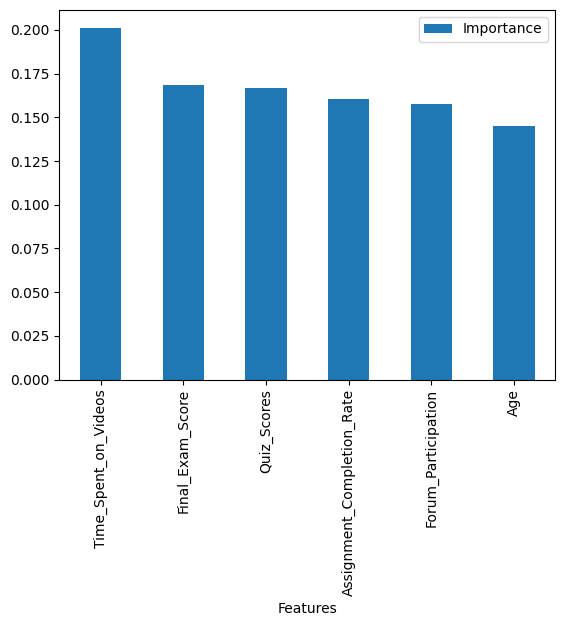

In [ ]:
feature_importance_tree_based_models(model = pipeline['model'],
                                     columns =  X_train.columns[pipeline['feature_selection'].get_support()])

This feature selection makes a lot more sense than the logistic regression's feature selection. Let me evaluate the performance and then revisit the comments.

After making feature selection more complex, I see fewer features here.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def random_forest_report(X, y, pipeline, label_map):
    """ This function will:
     1. Predict the outcome (dropout probability)
     2. Evaluate model performance through classification report and a confusion matrix"""
    
    prediction = pipeline.predict(X)

    print("### Classification Report ###")
    print(classification_report(y, prediction, target_names = label_map), "\n")

    print("\n")

    print("--- Confusion Matrix ---")
    print(pd.DataFrame(
        confusion_matrix(y_true = prediction, y_pred = y),
        columns = [["Actual " + sub for sub in label_map]],
        index = [["Predicted " + sub for sub in label_map]]
    ), "\n")

def random_forest_performance(X_train, y_train, X_test, y_test, pipeline, label_map):
    """This function will evaluate the model performance on both training and testing sets."""
    print("### Training Set Performance ### \n")
    random_forest_report(X_train, y_train, pipeline, label_map)

    print("### Testing Set Performance ### \n")
    random_forest_report(X_test, y_test, pipeline, label_map)

#Repurposing the logistic regression function.

In [ ]:
random_forest_performance(
    X_train = X_train,
    y_train = y_train,
    X_test = X_test,
    y_test = y_test,
    pipeline = pipeline,
    label_map = ["yes", "no"])

### Training Set Performance ### 

### Classification Report ###
              precision    recall  f1-score   support

         yes       0.88      0.71      0.79      5612
          no       0.35      0.62      0.45      1388

    accuracy                           0.69      7000
   macro avg       0.62      0.67      0.62      7000
weighted avg       0.78      0.69      0.72      7000
 



--- Confusion Matrix ---
              Actual yes Actual no
Predicted yes       3988       521
Predicted no        1624       867 

### Testing Set Performance ### 

### Classification Report ###
              precision    recall  f1-score   support

         yes       0.80      0.64      0.71      2431
          no       0.18      0.33      0.23       569

    accuracy                           0.58      3000
   macro avg       0.49      0.48      0.47      3000
weighted avg       0.68      0.58      0.62      3000
 



--- Confusion Matrix ---
              Actual yes Actual no
Predicted yes    

### XGBoosting

In [ ]:
from sklearn.model_selection import train_test_split # Importing train_test_split for splitting the dataset

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(["Dropout_Likelihood"], axis=1),
    df["Dropout_Likelihood"],
    test_size = 0.3,
    stratify= df["Dropout_Likelihood"],  # Stratifying by the target variable to maintain class distribution
    random_state = 42
)

print("Training set size: ",
      X_train.shape, 
      y_test.shape,
      "\n Testing set size: ",
      X_test.shape,
      y_test.shape)

Training set size:  (7000, 19) (3000,) 
 Testing set size:  (3000, 19) (3000,)


In [ ]:
len(y_train[y_train == 0]) / len(y_train[y_train == 1])

In [ ]:
### Feat Scaling
from sklearn.preprocessing import StandardScaler

### Feat Selection
from sklearn.feature_selection import SelectFromModel

### ML algorithms 
from xgboost import XGBClassifier

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

def pipeline_xgboost_classifier():
  pipeline = Pipeline([
        ( "model", XGBClassifier(
          max_depth = 3,
          n_estimators = 200,
          min_child_weight = 5,
          subsample = 0.8,
          colsample_bytree = 0.8,
          reg_lambda = 1.0,
          reg_alpha = 0.1,
          scale_pos_weight=scale_pos_weight,
          random_state=42)),

    ])

  return pipeline

In [ ]:
print(y_train.value_counts())

Dropout_Likelihood
0    5612
1    1388
Name: count, dtype: int64


In [ ]:
pipeline = pipeline_xgboost_classifier()
pipeline.fit(X_train, y_train)

Pipeline(steps=[('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None, min_child_weight=5,
                               missing=nan, monotone_constraints=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
                               random_state=42, ...))])

In [ ]:
random_forest_performance(X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                pipeline=pipeline,
                label_map= ["yes", "no"]
                )

### Training Set Performance ### 

### Classification Report ###
              precision    recall  f1-score   support

         yes       0.95      0.77      0.85      5612
          no       0.47      0.82      0.60      1388

    accuracy                           0.78      7000
   macro avg       0.71      0.80      0.72      7000
weighted avg       0.85      0.78      0.80      7000
 



--- Confusion Matrix ---
              Actual yes Actual no
Predicted yes       4328       244
Predicted no        1284      1144 

### Testing Set Performance ### 

### Classification Report ###
              precision    recall  f1-score   support

         yes       0.80      0.64      0.71      2431
          no       0.17      0.32      0.22       569

    accuracy                           0.58      3000
   macro avg       0.49      0.48      0.47      3000
weighted avg       0.68      0.58      0.62      3000
 



--- Confusion Matrix ---
              Actual yes Actual no
Predicted yes    

Model is overfitting

# Challenges